In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("2014 and 2015 CSM dataset.xlsx")

Target prediksi adalah ratings

In [3]:
data.head()

,Movie,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
0,13 Sins,2014,6.3,8,9130,4000000.0,45.0,1,0,3280543,4632,425,636,1120000.0
1,22 Jump Street,2014,7.1,1,192000000,50000000.0,3306.0,2,2,583289,3465,61,186,12350000.0
2,3 Days to Kill,2014,6.2,1,30700000,28000000.0,2872.0,1,0,304861,328,34,47,483000.0
3,300: Rise of an Empire,2014,6.3,1,106000000,110000000.0,3470.0,2,0,452917,2429,132,590,568000.0
4,A Haunted House 2,2014,4.7,8,17300000,3500000.0,2310.0,2,0,3145573,12163,610,1082,1923800.0


Kita akan lihat info sekilas mengenai datanya

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 14 columns):
Movie                  234 non-null object
Year                   234 non-null int64
Ratings                234 non-null float64
Genre                  234 non-null int64
Gross                  234 non-null int64
Budget                 233 non-null float64
Screens                224 non-null float64
Sequel                 234 non-null int64
Sentiment              234 non-null int64
Views                  234 non-null int64
Likes                  234 non-null int64
Dislikes               234 non-null int64
Comments               234 non-null int64
Aggregate Followers    198 non-null float64
dtypes: float64(4), int64(9), object(1)
memory usage: 25.7+ KB


Kita bisa lihat ada beberapa missing valueas pada Budget,Screens,dan Followers

In [11]:
data[pd.isnull(data.Budget)]

,Movie,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
122,The Fluffy Movie: Unity Through Laughter,2014,7.0,8,2820000,NaN,432.0,1,0,10747,4,1,1,818000.0


In [12]:
data[pd.isnull(data.Screens)]

,Movie,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
5,A Long Way Off,2014,4.6,3,29000,500000.0,NaN,1,0,91137,112,7,1,310000.0
24,Camp X-Ray,2014,7.0,3,9840,1000000.0,NaN,1,3,7128,1,0,0,2182.0
33,Dracula Untold,2014,6.3,1,55900000,70000000.0,NaN,1,0,9149892,26427,1342,5278,395500.0
39,Falcon Rising,2014,5.7,1,8690,4500000.0,NaN,1,0,735551,636,98,92,1060000.0
69,Life After Beth,2014,5.7,8,8300,2400000.0,NaN,1,0,1222921,5553,193,335,1463000.0
86,Not Cool,2014,5.2,8,35700,600000.0,NaN,1,0,5403836,187162,3145,24919,2720000.0
97,Rudderless,2014,7.5,8,37400,5000000.0,NaN,1,0,827239,3221,89,432,217000.0
117,The Devil's Hand,2014,4.8,7,4240,7000000.0,NaN,1,0,330363,406,52,92,NaN
130,The Identical,2014,5.0,3,2820000,12000000.0,NaN,1,0,309610,729,97,113,275873.0
185,War Room,2015,5.4,1,12300000,3000000.0,NaN,1,10,66872,400,67,201,NaN


In [14]:
data[pd.isnull(data["Aggregate Followers"])]

,Movie,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
25,Cantinflas,2014,6.7,9,6370000,3.000000e+06,382.0,1,3,2902492,9522,558,2296,NaN
44,Gods Pocket,2014,6.1,10,104000,1.000000e+06,3.0,1,0,99427,47,10,12,NaN
45,God's Pocket,2014,6.1,10,104000,1.000000e+06,3.0,1,0,99427,47,10,12,NaN
50,Heaven Is for Real,2014,5.8,3,91400000,1.200000e+07,2417.0,1,-9,175017,461,34,133,NaN
56,Inherent Vice,2014,6.7,8,8090000,2.000000e+07,645.0,1,1,1167941,2651,82,797,NaN
60,It Follows,2014,6.9,15,14700000,2.000000e+06,4.0,1,-9,4877,6,1,1,NaN
63,John Wick,2014,7.2,1,43000000,2.000000e+07,2589.0,1,0,4846645,14722,405,2732,NaN
66,Kung Fu Jungle,2014,6.5,1,129000,2.500000e+07,28.0,1,-2,289922,143,17,9,NaN
71,Lucy,2014,6.4,1,127000000,4.000000e+07,3173.0,1,1,1142964,2346,167,311,NaN
78,My Old Lady,2014,6.3,8,4010000,5.000000e+06,255.0,1,0,446576,659,50,45,NaN


KIta akan imputasi data

In [25]:
data.fillna(data.mean(),inplace=True)

,Movie,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
0,13 Sins,2014,6.3,8,9130,4000000.0,45.000000,1,0,3280543,4632,425,636,1.120000e+06
1,22 Jump Street,2014,7.1,1,192000000,50000000.0,3306.000000,2,2,583289,3465,61,186,1.235000e+07
2,3 Days to Kill,2014,6.2,1,30700000,28000000.0,2872.000000,1,0,304861,328,34,47,4.830000e+05
3,300: Rise of an Empire,2014,6.3,1,106000000,110000000.0,3470.000000,2,0,452917,2429,132,590,5.680000e+05
4,A Haunted House 2,2014,4.7,8,17300000,3500000.0,2310.000000,2,0,3145573,12163,610,1082,1.923800e+06
5,A Long Way Off,2014,4.6,3,29000,500000.0,2198.183036,1,0,91137,112,7,1,3.100000e+05
6,A Million Ways to Die in the West,2014,6.1,8,42600000,40000000.0,3158.000000,1,0,3013011,9595,419,1020,8.153000e+06
7,A Most Violent Year,2014,7.1,1,5750000,20000000.0,818.000000,1,2,1854103,2207,197,593,1.306550e+05
8,A Walk Among the Tombstones,2014,6.5,10,26000000,28000000.0,2714.000000,1,3,2213659,2210,419,382,1.256460e+05
9,About Last Night,2014,6.1,8,48600000,12500000.0,2253.000000,1,0,5218079,11709,532,770,2.169730e+07


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 14 columns):
Movie                  234 non-null object
Year                   234 non-null int64
Ratings                234 non-null float64
Genre                  234 non-null int64
Gross                  234 non-null int64
Budget                 234 non-null float64
Screens                234 non-null float64
Sequel                 234 non-null int64
Sentiment              234 non-null int64
Views                  234 non-null int64
Likes                  234 non-null int64
Dislikes               234 non-null int64
Comments               234 non-null int64
Aggregate Followers    234 non-null float64
dtypes: float64(4), int64(9), object(1)
memory usage: 25.7+ KB


Setelah selesai kita akan melakukan inpeksi ratings

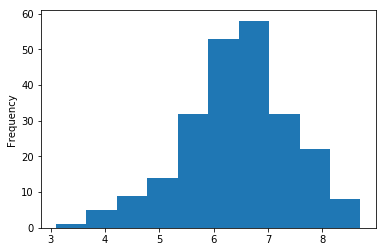

In [30]:
data.Ratings.plot(kind="hist")